# **BIGMART SUPERMARKET** Sales Prediction.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

import warnings
warnings.filterwarnings("ignore")

In [2]:
trainData = pd.read_csv("bigmart_train.csv")
testData = pd.read_csv("bigmart_test.csv")

In [3]:
trainData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
testData.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Exploratory Data Analysis

In [5]:
print("Shape of the Train Data : ", trainData.shape)
print("Shape of the Test Data : ", testData.shape)

Shape of the Train Data :  (8523, 12)
Shape of the Test Data :  (5681, 11)


In [6]:
trainData.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
trainData.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
testData.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
missItemWeight = (trainData.isnull().sum()["Item_Weight"]) / (trainData.shape[0]) * 100
print("Percentage of Missing data of the column 'Item_Weight' : ", missItemWeight)

missOutletSize = (trainData.isnull().sum()["Outlet_Size"]) / (trainData.shape[0]) * 100
print("Percentage of Missing data of the column 'Outlet_Size' : ", missOutletSize)

Percentage of Missing data of the column 'Item_Weight' :  17.165317376510618
Percentage of Missing data of the column 'Outlet_Size' :  28.27642848762173


In [10]:
trainData["source"] = "train"
testData["source"] = "test"
df=pd.concat([trainData,testData], ignore_index=True)

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [12]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [14]:
missItemWeight = (df.isnull().sum()["Item_Weight"]) / (df.shape[0]) * 100
print("Percentage of Missing data of the column 'Item_Weight' : ", missItemWeight)

missOutletSize = (df.isnull().sum()["Outlet_Size"]) / (df.shape[0]) * 100
print("Percentage of Missing data of the column 'Outlet_Size' : ", missOutletSize)

Percentage of Missing data of the column 'Item_Weight' :  17.17121937482399
Percentage of Missing data of the column 'Outlet_Size' :  28.273725711067303


In [15]:
df.shape

(14204, 13)

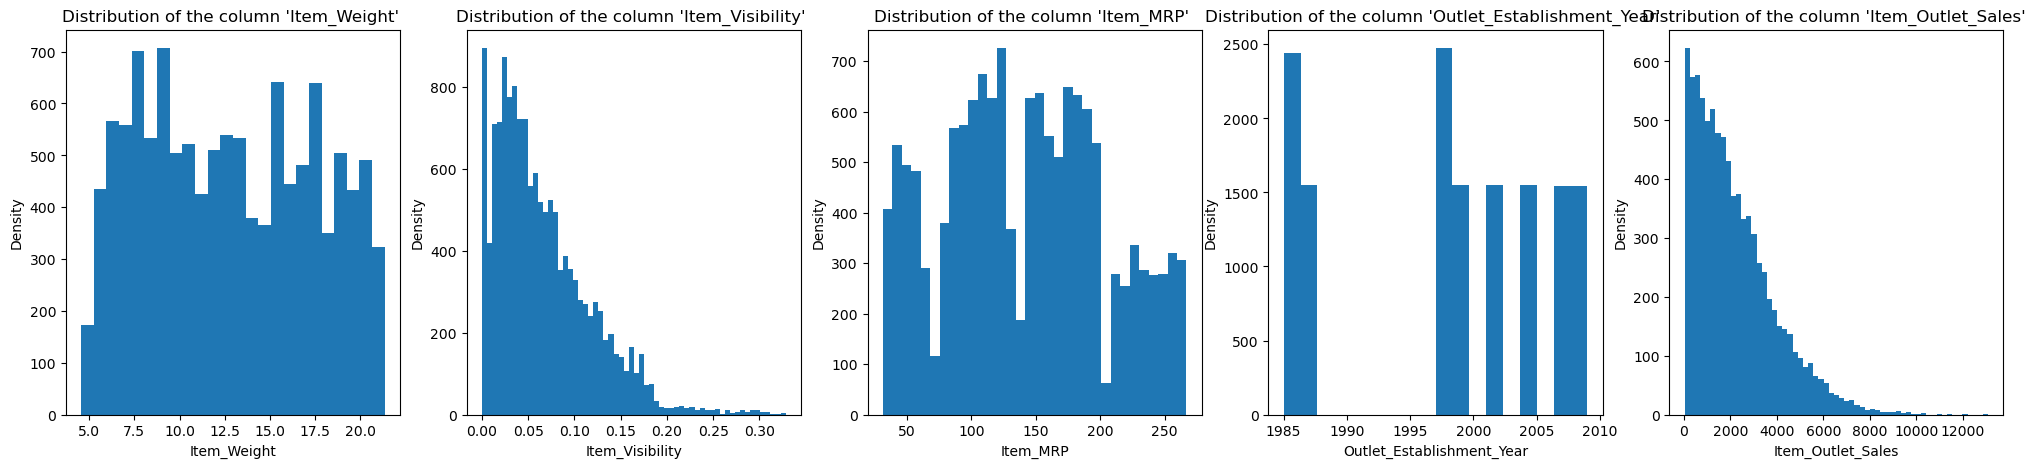

In [16]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

for indx, column in enumerate(df.describe().columns):
    ax[indx].hist(df[column].dropna(), bins="fd")
    ax[indx].set_title(f"Distribution of the column '{column}' ")
    ax[indx].set_xlabel(f'{column}')
    ax[indx].set_ylabel("Density")

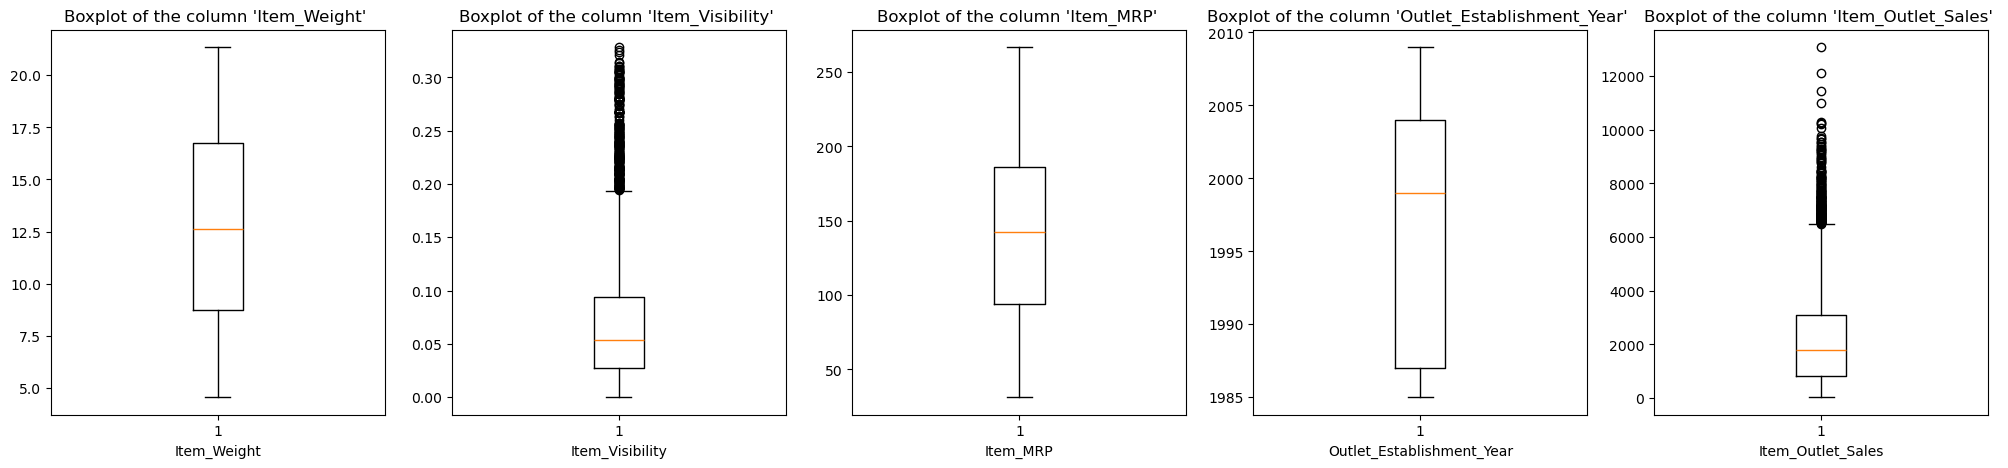

In [17]:
fig, ax = plt.subplots(1,5, figsize=(25,5))

for indx, column in enumerate(df.describe().columns):
    ax[indx].boxplot(df[column].dropna(), )
    ax[indx].set_title(f"Boxplot of the column '{column}' ")
    ax[indx].set_xlabel(f'{column}')

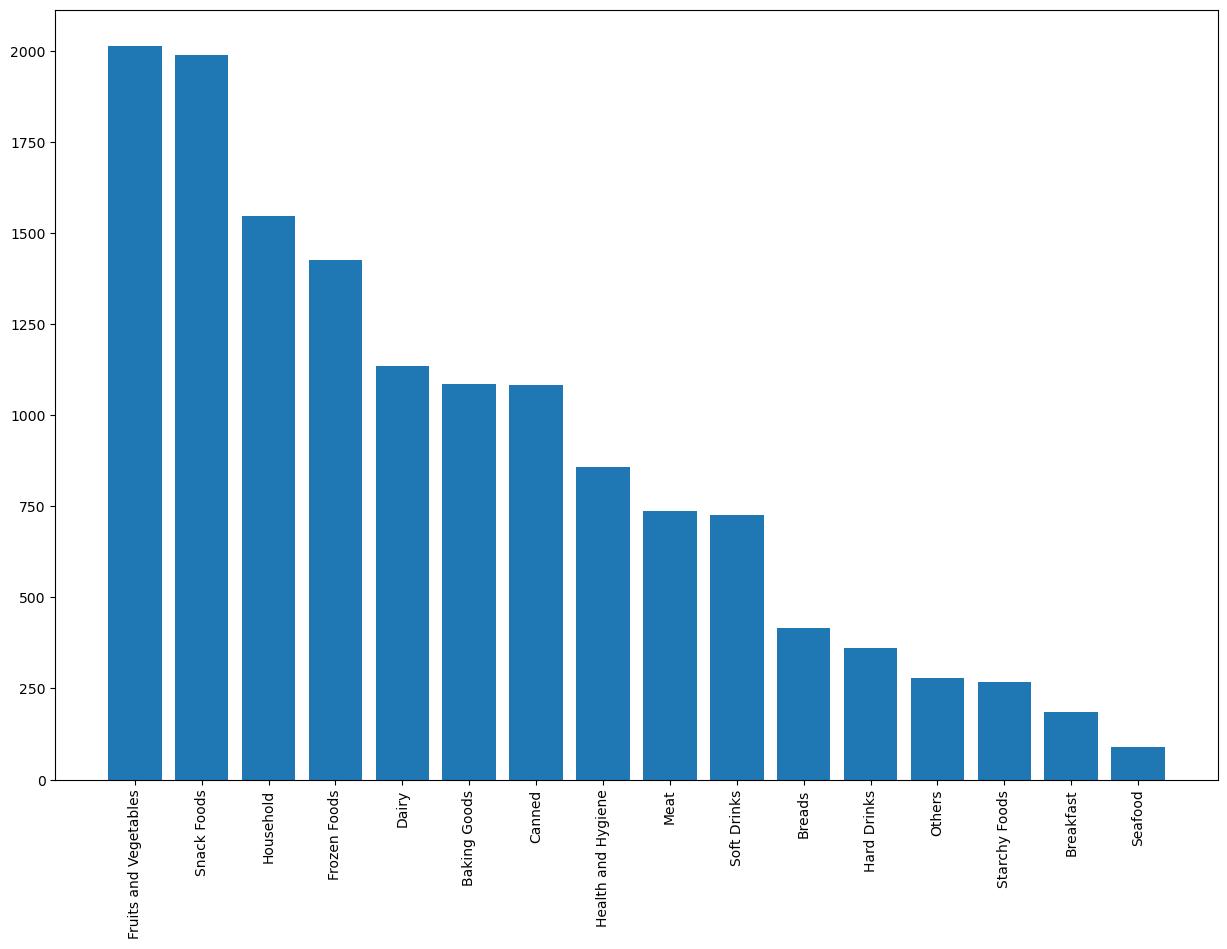

In [18]:
vcItemType = df["Item_Type"].value_counts()

plt.figure(figsize=(15,10))
plt.bar(vcItemType.index,vcItemType.values)
plt.xticks(rotation=90)
plt.show()

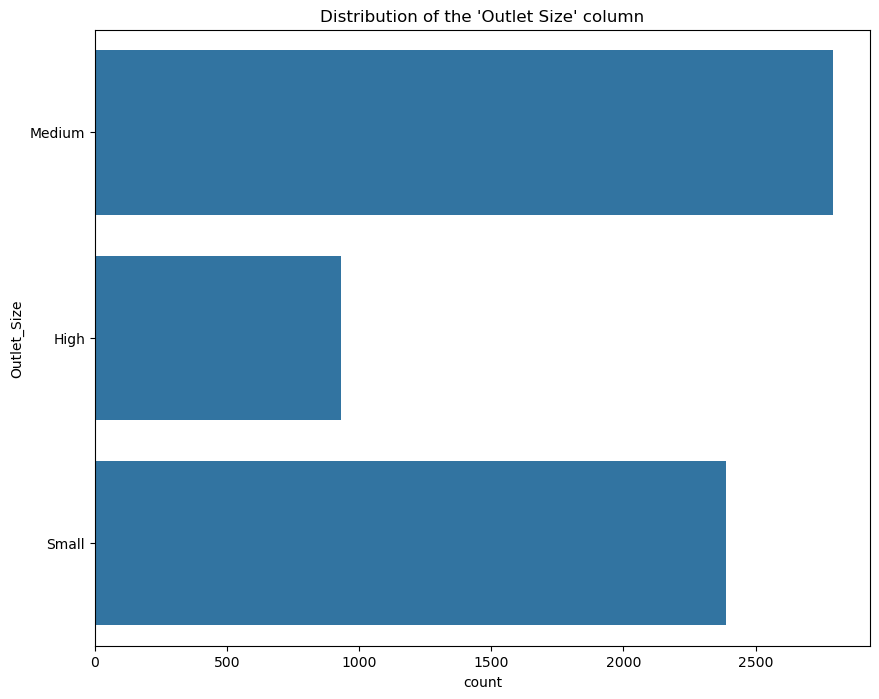

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(trainData.Outlet_Size)
plt.title("Distribution of the 'Outlet Size' column")
plt.show()

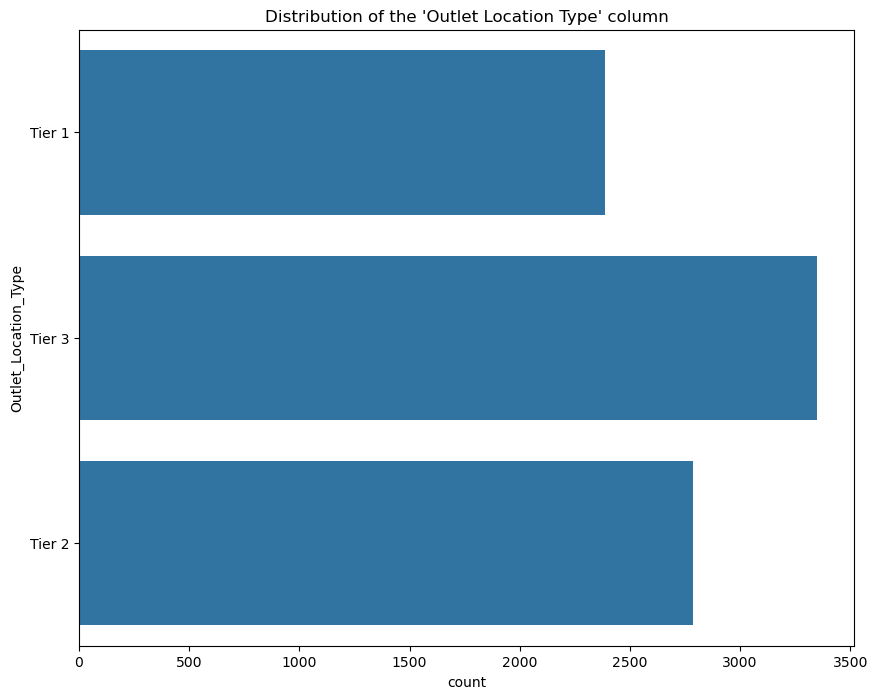

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(trainData["Outlet_Location_Type"])
plt.title("Distribution of the 'Outlet Location Type' column")
plt.show()

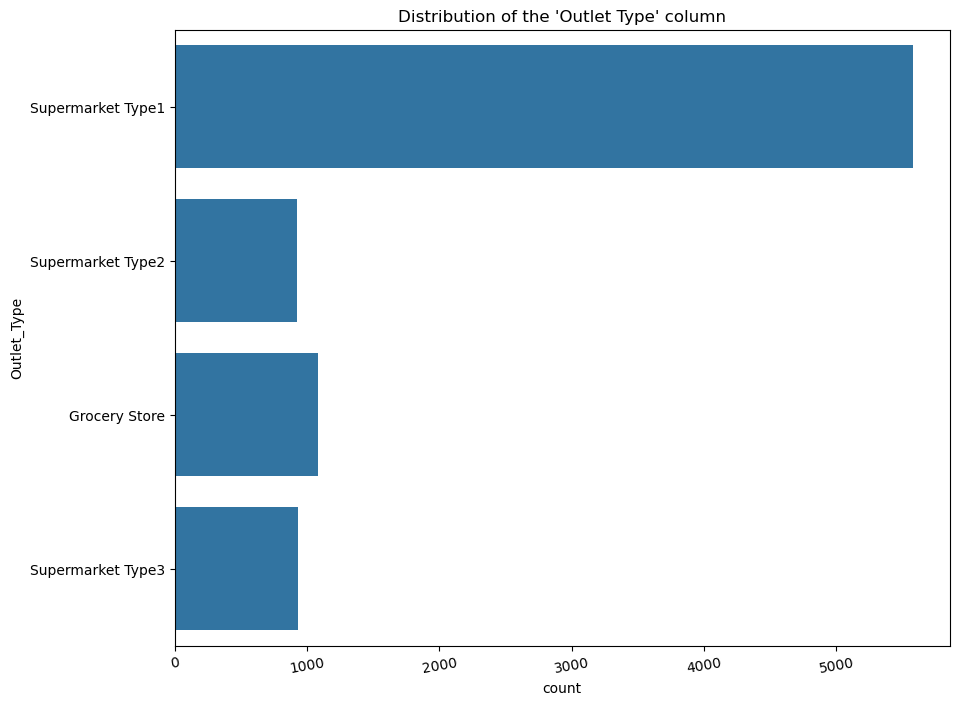

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(trainData.Outlet_Type)
plt.xticks(rotation=10)
plt.title("Distribution of the 'Outlet Type' column")
plt.show()

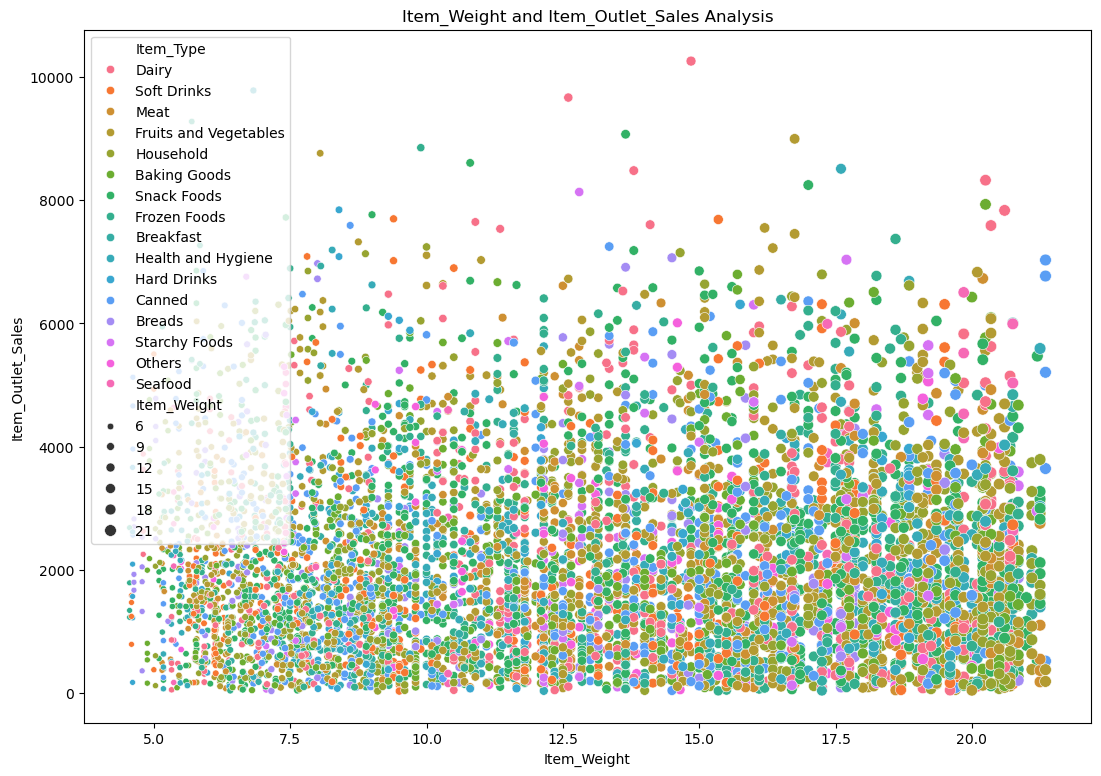

In [22]:
plt.figure(figsize=(13,9))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales",hue="Item_Type", size="Item_Weight",data=trainData)
plt.show()

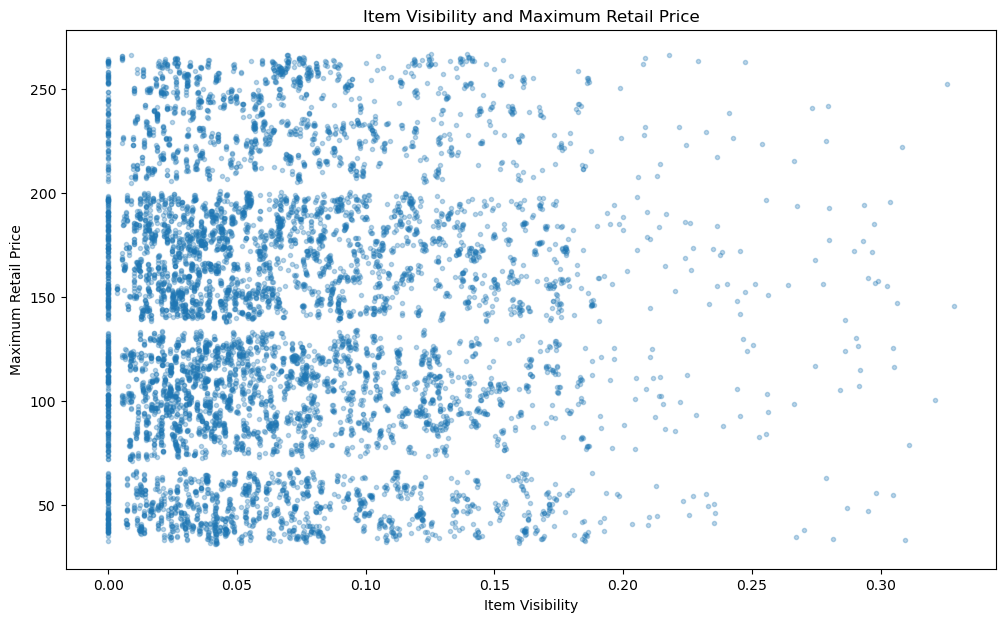

In [23]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item Visibility and Maximum Retail Price")
plt.plot(trainData.Item_Visibility, trainData.Item_MRP, ".",alpha = 0.3)

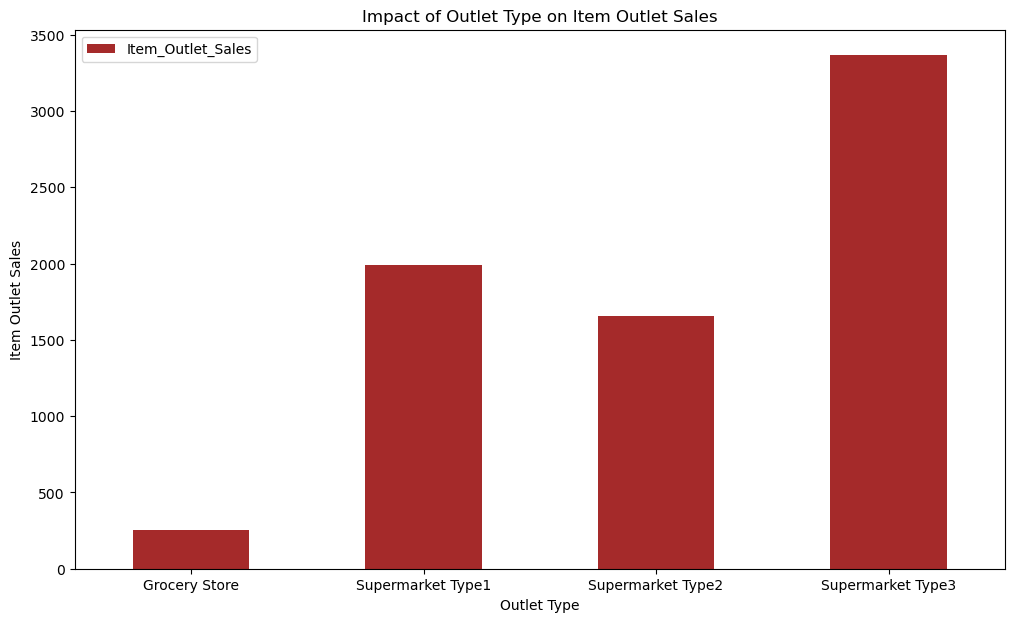

In [24]:
itemTypePivot = trainData.pivot_table(index="Outlet_Type", values="Item_Outlet_Sales", aggfunc=np.median)

itemTypePivot.plot(kind="bar",color="brown",figsize=(12,7))
plt.xlabel("Outlet Type")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Type on Item Outlet Sales")
plt.xticks(rotation=0)
plt.show()

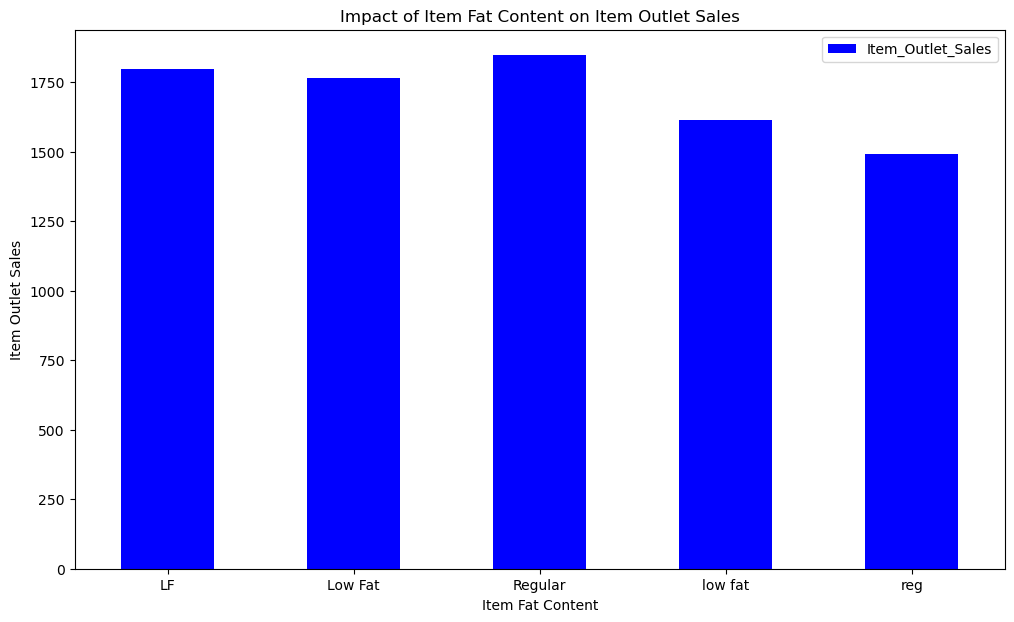

In [25]:
itemTypePivot = trainData.pivot_table(index="Item_Fat_Content", values="Item_Outlet_Sales", aggfunc=np.median)

itemTypePivot.plot(kind="bar",color="blue",figsize=(12,7))
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Item Fat Content on Item Outlet Sales")
plt.xticks(rotation=0)
plt.show()

In [26]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [27]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
trainData["Item_Fat_Content"] = trainData["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

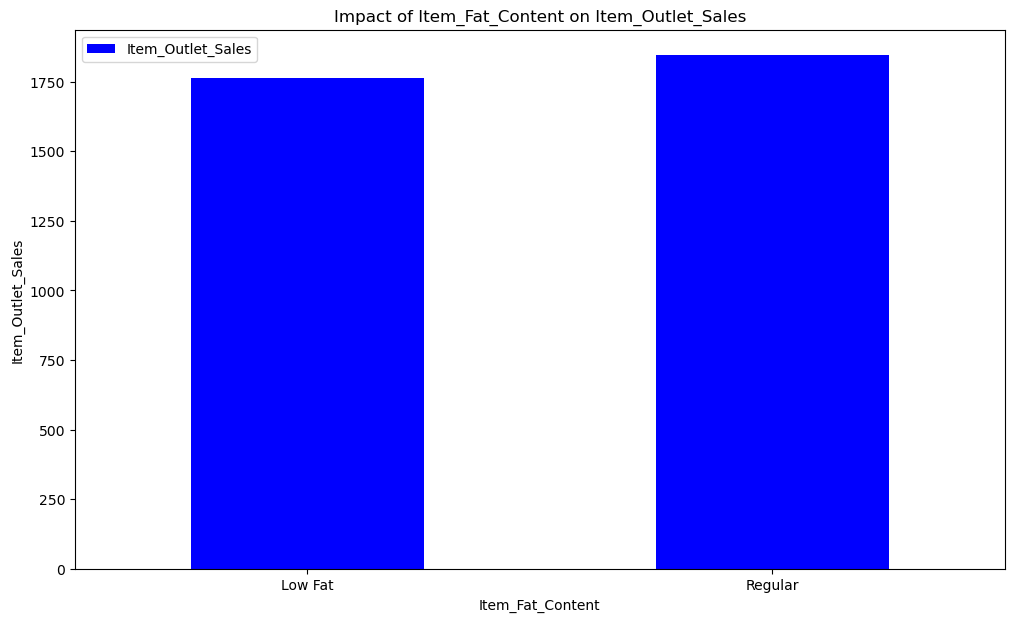

In [28]:
itemFatContentPivot = trainData.pivot_table(index="Item_Fat_Content",values="Item_Outlet_Sales",aggfunc=np.median)

itemFatContentPivot.plot(kind="bar",color="blue",figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

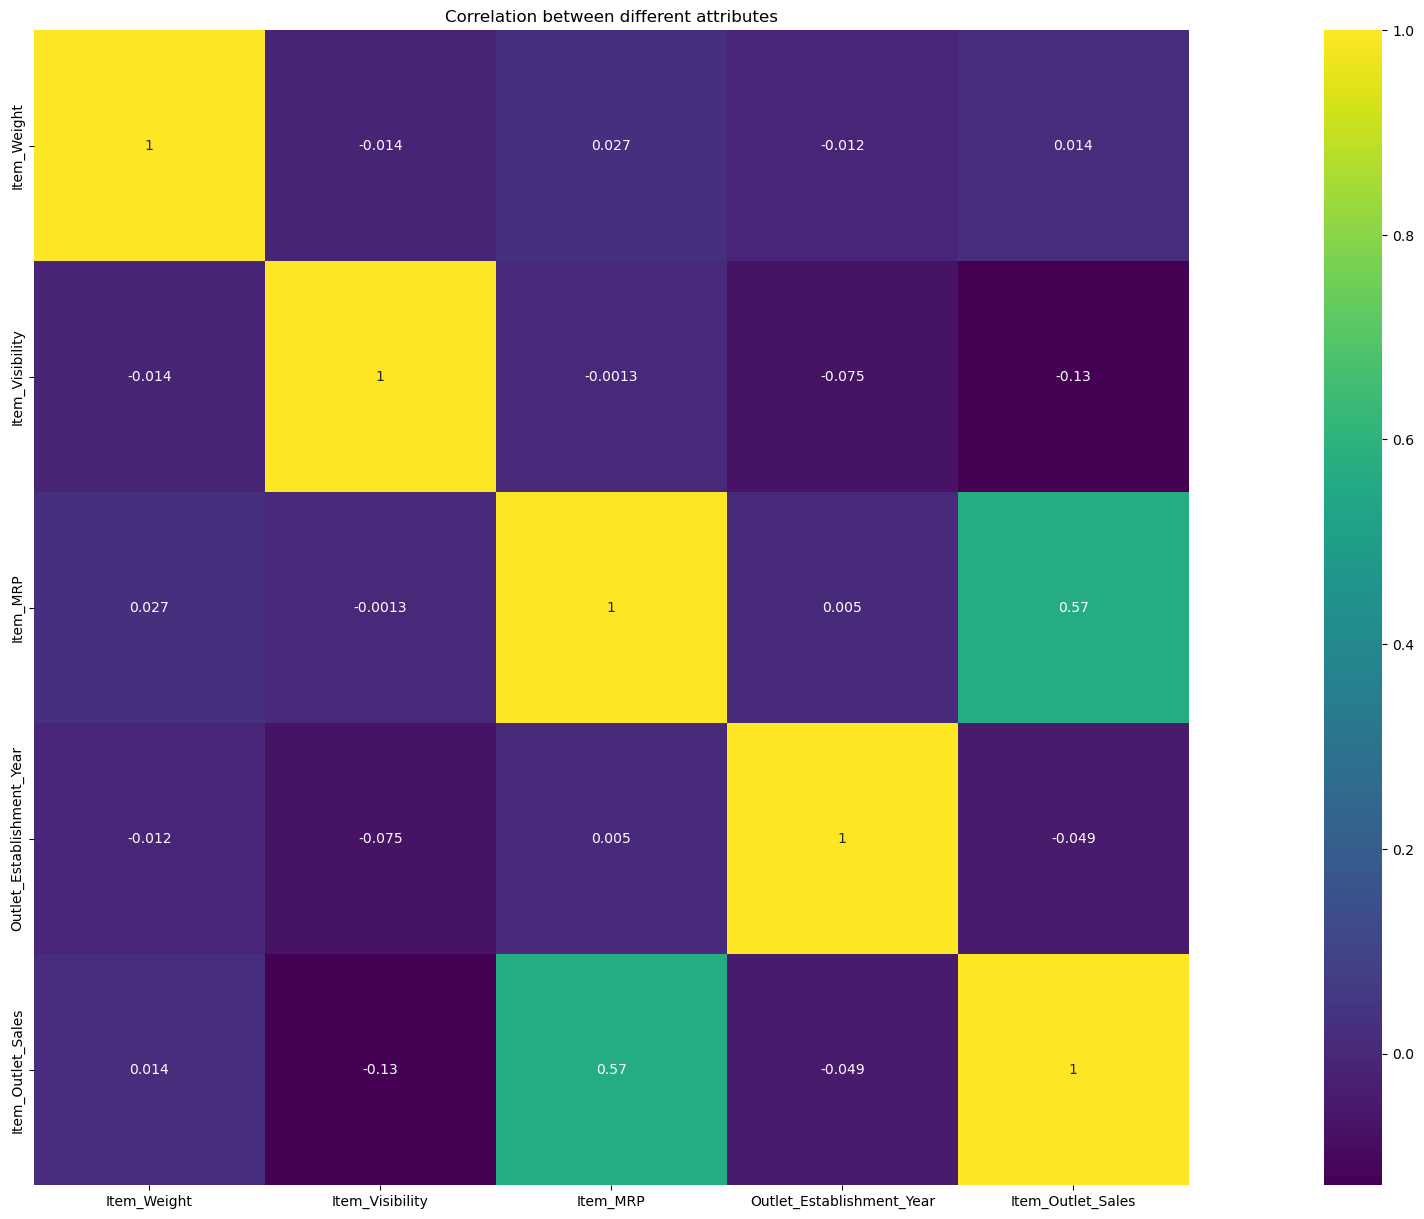

In [29]:
numColumns = list(trainData.describe().columns)

plt.figure(figsize=(35,15))
sns.heatmap(trainData[numColumns].corr(),vmax=1, square=True,annot=True, cmap="viridis")
plt.title("Correlation between different attributes")
plt.show()

## Feature Engineering , Selection and Transformation

### Treating The Missing Values

From the boxplot and histogram we plotted at the beginning, we noticed that the item_weight column is approximately normal and it is therefore helpful to replace the missing values with the Mean of the column.

In [30]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace=True)

We will replace the missing values in Outlet_Size with the item that appears frequently, in this case Medium.

In [31]:
df["Outlet_Size"].fillna("Medium", inplace=True)

In [32]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [33]:
df[df["Item_Visibility"]==0]["Item_Visibility"].count()
df["Item_Visibility"].fillna(df["Item_Visibility"].median(), inplace=True)

In [34]:
df["Outlet_Establishment_Year"].value_counts()

Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: count, dtype: int64

In [35]:
df["Outlet_Years"] = 2024-df["Outlet_Establishment_Year"]
df["Outlet_Years"].describe()

count    14204.000000
mean        26.169319
std          8.371664
min         15.000000
25%         20.000000
50%         25.000000
75%         37.000000
max         39.000000
Name: Outlet_Years, dtype: float64

In [36]:
df["Item_Identifier"].value_counts()

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64

A closer look at each of the Item_Identifier shows that they with either "FD", "DR"(Drinks), "NC"(Non-Consumables)

For us to do a better analysis, we will be creating 3 categories as pointed out instead of the already existing 16 categories.

In [37]:
df["New_Item_type"] = df["Item_Identifier"].apply(lambda x: x[0:2])
df["New_Item_type"] = df["New_Item_type"].map({"FD":"Food","NC":"Non-Consumable","DR":"Drinks"})
df["New_Item_type"].value_counts()

New_Item_type
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

If a product is non-consumable then why associate a fat-content to them? We will get rid of this.

In [38]:
df.loc[df["New_Item_type"]=="Non-Consumable","Item_Fat_Content"]= "Non-Edible"
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat       6499
Regular       5019
Non-Edible    2686
Name: count, dtype: int64

Under normal circumstance, if a product is more visible, then it's likely it will be getting higher sales. We can based on that hypothesis and create importance given to a product in a given store according to the mean of significance given to the same product in all other stores.

In [39]:
item_visib_avg = df.pivot_table(values="Item_Visibility", index="Item_Identifier")

function = lambda x: x["Item_Visibility"]/item_visib_avg["Item_Visibility"][item_visib_avg.index == x["Item_Identifier"]][0]
df["item_visib_avg"] = df.apply(function,axis=1).astype(float)

In [40]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,25,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,15,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,25,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,26,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,37,Non-Consumable,0.000000


### Dealing with our Categorical Variables

In [41]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df["Outlet"] = label.fit_transform(df["Outlet_Identifier"])
varib = ["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","New_Item_type","Outlet_Type","Outlet"]
for i in varib:
  df[i] = label.fit_transform(df[i])


In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,25,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,15,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,25,1,0.960069,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,26,1,0.000000,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,37,2,0.000000,1


In [43]:
df = pd.get_dummies(df, columns =["Item_Fat_Content","Outlet_Location_Type","Outlet_Size","New_Item_type","Outlet_Type","Outlet"])
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0              bool
Item_Fat_Content_1              bool
Item_Fat_Content_2              bool
Outlet_Location_Type_0          bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Outlet_Size_0                   bool
Outlet_Size_1                   bool
Outlet_Size_2                   bool
New_Item_type_0                 bool
New_Item_type_1                 bool
New_Item_type_2                 bool
Outlet_Type_0                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
O

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,25,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,15,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,25,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,26,...,True,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,37,...,False,True,False,False,False,False,False,False,False,False


## Model Building

In [45]:
df.drop(["Item_Type","Outlet_Establishment_Year"],axis=1, inplace=True)

train = df.loc[df["source"] == "train"]
test = df.loc[df["source"] == "test"]

train.drop(["source"],axis=1,inplace=True)
test.drop(["Item_Outlet_Sales","source"],axis=1,inplace=True)

X = train.drop(["Item_Outlet_Sales","Item_Identifier","Outlet_Identifier"],axis=1)
y = train["Item_Outlet_Sales"]
xTestLast = test.drop(["Item_Identifier","Outlet_Identifier"],axis=1).copy()

In [46]:
scaler = MinMaxScaler()
columns = list(X.columns)
for col in columns:
    X[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(X[col])),columns=[col])


In [47]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,item_visib_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.282525,0.048866,0.927507,0.416667,0.309319,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,0.058705,0.072068,0.000000,0.310096,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.051037,0.468288,0.416667,0.318950,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,0.000000,0.640093,0.458333,0.000000,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.916667,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=0)

print("Shape of xTrain: ",xTrain.shape)
print("Shape of yTrain: ",yTrain.shape)
print("Shape of xTest: ",xTest.shape)
print("Shape of yTest: ",yTest.shape)

Shape of xTrain:  (6818, 31)
Shape of yTrain:  (6818,)
Shape of xTest:  (1705, 31)
Shape of yTest:  (1705,)


### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

kFold =KFold(n_splits=10, shuffle=True, random_state=0)

params = {
    "fit_intercept":[True,False]
}

gridSearch = GridSearchCV(estimator=model, param_grid=params, scoring="neg_mean_squared_error", cv=kFold, n_jobs=-1)

gridSearch.fit(xTrain,yTrain)

print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModel = gridSearch.best_estimator_

scoreLR = round(bestModel.score(xTest,yTest)*100,2)
print("R^2 Score: ", scoreLR)

En iyi parametreler:  {'fit_intercept': False}
En iyi negatif MSE:  -1275854.096570613
R^2 Score:  56.38


### Polinomial Regression

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("linear_regression", LinearRegression())
])

param_grid = {
    "poly_features__degree": [2, 3, 4, 5, 6, 7],
    "linear_regression__fit_intercept": [True, False]
}


gridSearch = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=kFold, scoring="neg_mean_squared_error", n_jobs=4)

gridSearch.fit(xTrain, yTrain)

print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModel = gridSearch.best_estimator_


scorePR = round(bestModel.score(xTest, yTest) * 100, 2)
print("R^2 Skoru: ", scorePR)


En iyi parametreler:  {'linear_regression__fit_intercept': False, 'poly_features__degree': 2}
En iyi negatif MSE:  -1165000.127631128
R^2 Skoru:  59.82


### Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor

params = {
    "max_depth" : [1, 3, 5, 7, 10, 15, 25]
}

model=DecisionTreeRegressor()

gridSearch = GridSearchCV(estimator=model, param_grid=params, cv=kFold, scoring="neg_mean_squared_error", n_jobs=4)

gridSearch.fit(xTrain, yTrain)

print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModel = gridSearch.best_estimator_

scoreDT = round(bestModel.score(xTest, yTest) * 100, 2)
print("R^2 Skoru: ", scoreDT)

En iyi parametreler:  {'max_depth': 5}
En iyi negatif MSE:  -1175048.0550255629
R^2 Skoru:  58.34


### Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

params = {
    "n_estimators" : [5, 15, 45, 70, 100],
    "max_depth" : [1, 3, 5, 7, 10, 15, 25]
}

model=RandomForestRegressor()

gridSearch = GridSearchCV(estimator=model, param_grid=params, cv=kFold, scoring="neg_mean_squared_error", n_jobs=4)

gridSearch.fit(xTrain, yTrain)


print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModel = gridSearch.best_estimator_

scoreRF = round(bestModel.score(xTest, yTest) * 100, 2)
print("R^2 Skoru: ", scoreRF)

En iyi parametreler:  {'max_depth': 5, 'n_estimators': 100}
En iyi negatif MSE:  -1165750.8315608273
R^2 Skoru:  59.06


### XGBoost Regressor

In [55]:
from xgboost import XGBRegressor

params = {
    "n_estimators" : [5, 15, 45, 70, 100],
    "learning_rate" : [0.01, 0.05, 0.1, 0.5, 1],
    "max_depth" : [1, 3, 5, 7, 10, 15, 25]
}

model=XGBRegressor()

gridSearch = GridSearchCV(estimator=model, param_grid=params, cv=kFold, scoring="neg_mean_squared_error", n_jobs=4)

gridSearch.fit(xTrain, yTrain)

print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModel = gridSearch.best_estimator_

scoreXG = round(bestModel.score(xTest, yTest) * 100, 2)
print("R^2 Skoru: ", scoreXG)

En iyi parametreler:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
En iyi negatif MSE:  -1157905.6915857706
R^2 Skoru:  59.65


### MultiLayer Perceptron Regressor

In [56]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(max_iter=1000)

param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (100, 50), (50, 25, 10)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "sgd"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "adaptive"]
}


gridSearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=kFold, scoring="neg_mean_squared_error", n_jobs=4)

gridSearch.fit(xTrain, yTrain)

print("En iyi parametreler: ", gridSearch.best_params_)
print("En iyi negatif MSE: ", gridSearch.best_score_)

bestModel = gridSearch.best_estimator_

scoreMLP = round(bestModel.score(xTest, yTest) * 100, 2)
print("R^2 Skoru: ", scoreMLP)

En iyi parametreler:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
En iyi negatif MSE:  -1159014.6338352398
R^2 Skoru:  60.48


## Comparison

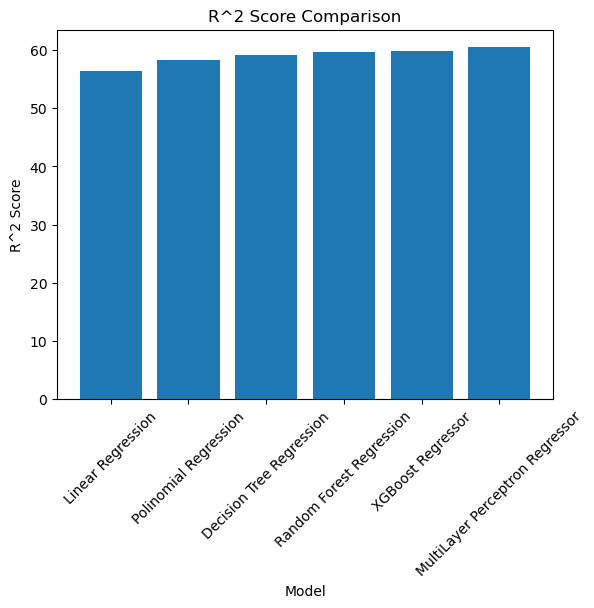

In [66]:
R2Scores = np.sort([scoreLR, scorePR, scoreDT, scoreRF, scoreXG, scoreMLP])

plt.bar(["Linear Regression", "Polinomial Regression", "Decision Tree Regression", "Random Forest Regression", "XGBoost Regressor", "MultiLayer Perceptron Regressor"], R2Scores)
plt.title("R^2 Score Comparison")
plt.xlabel("Model")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.show()